In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Test for stationary using ADF test


The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

The Augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative
number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.

**ADF test is conducted with the following assumptions:**

Null Hypothesis (HO): Series is non-stationary or series has a unit root.
Alternate Hypothesis(HA): Series is stationary or series has no unit root.

If the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.

**Conditions to Reject Null Hypothesis(HO):**

If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(HO) i.e., time series does not have a unit root, meaning it is stationary, else otherwise.

In [ ]:
def adf_test(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC') #AIC: Method to use when automatically determining the lag length among the values 0, 1, …, maxlag
    #The t-value measures the size of the difference relative to the variation in your sample data.
    #T is simply the calculated difference represented in units of standard error.
    #The greater the magnitude of T, the greater the evidence against the null hypothesis.

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value','Lags Used','No. of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value #Critical values for the ADF test for 1%, 5%, and 10% significance levels with the constant model are −3.43, −2.87, and −2.57, respectively.
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")


# FACEBOOK DATASET

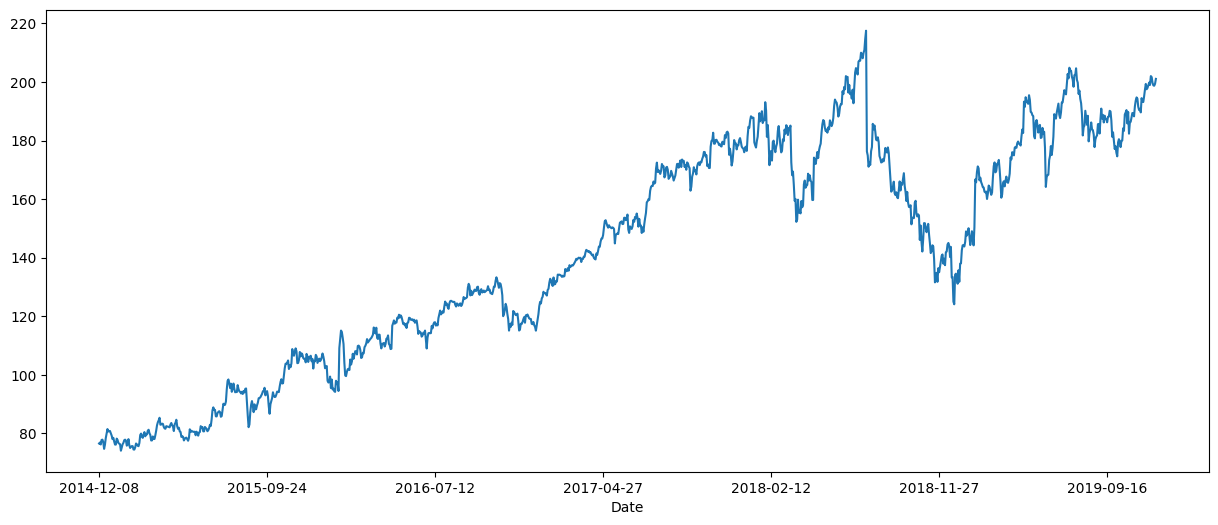

In [ ]:
series = pd.read_csv(r'/content/FB.csv', header=0, index_col=0)
series['Close'].plot(figsize=(15,6))
plt.show()

In [ ]:
Augmented_Dickey_Fuller_Test_func(series['Close'], 'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistics               -1.338096
p-value                        0.611568
Lags Used                      0.000000
No. of Observations Used    1258.000000
Critical Value (1%)           -3.435559
Critical Value (5%)           -2.863840
Critical Value (10%)          -2.567995
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


<Axes: xlabel='Date'>

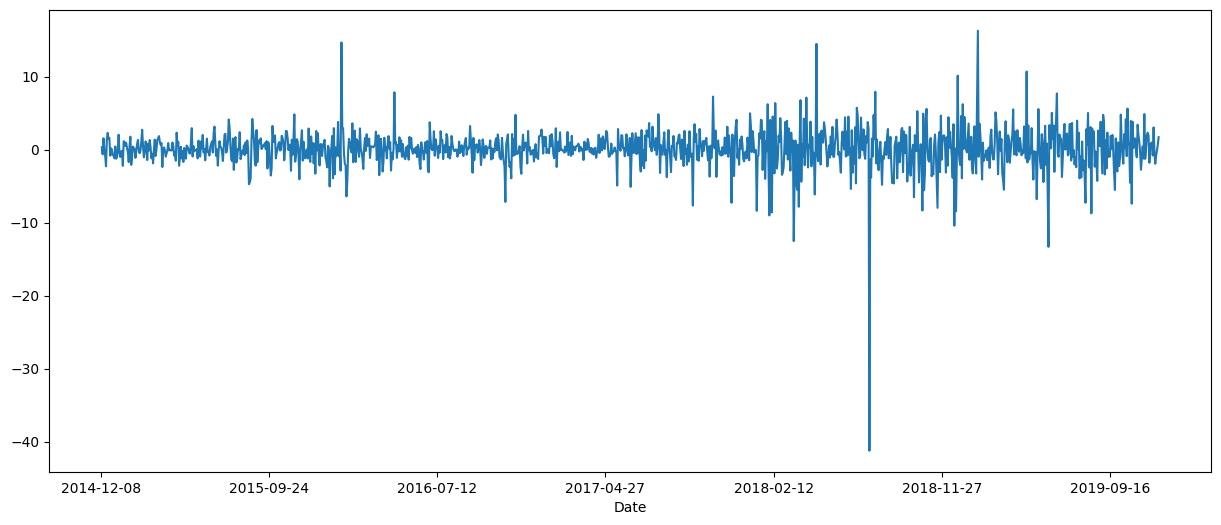

In [ ]:
series['Close'].diff().plot(figsize=(15,6))

In [ ]:
Augmented_Dickey_Fuller_Test_func(series['Close'].diff().dropna(),'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistics              -36.114559
p-value                        0.000000
Lags Used                      0.000000
No. of Observations Used    1257.000000
Critical Value (1%)           -3.435563
Critical Value (5%)           -2.863842
Critical Value (10%)          -2.567996
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


# COUNTRY GDP DATASET

In [ ]:
country_GDP = pd.read_excel('/content/Country_GDP.xlsx',header=0,index_col=0)
country_GDP.head()

,GDP
Time,
1947-01-01,2034.450
1947-04-01,2029.024
1947-07-01,2024.834
1947-10-01,2056.508
1948-01-01,2087.442


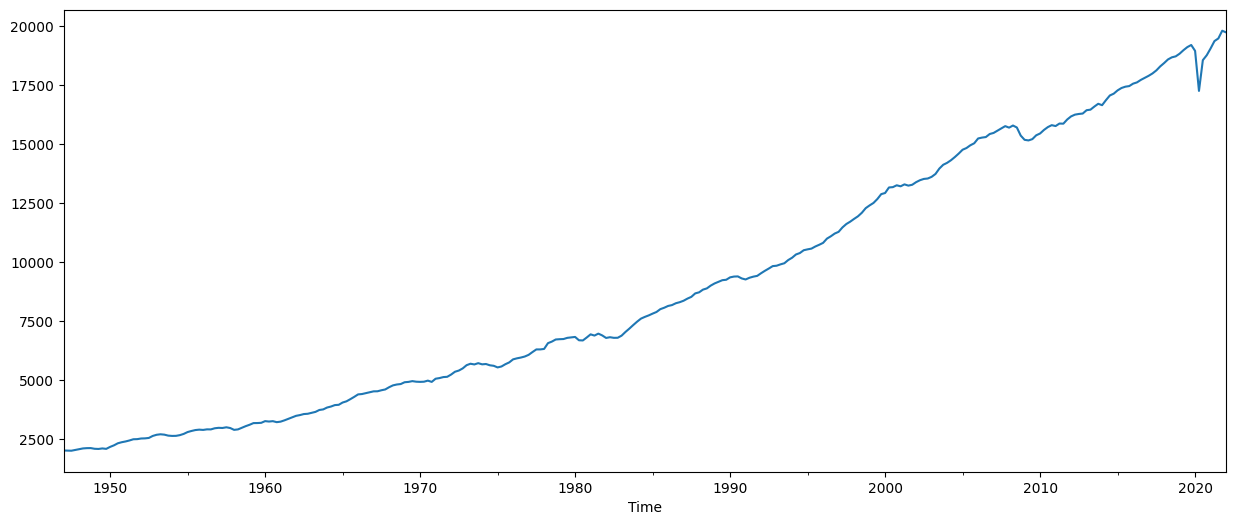

In [ ]:
country_GDP['GDP'].plot(figsize=(15,6))
plt.show()

**ADF test is conducted with the following assumptions:**

Null Hypothesis (HO): Series is non-stationary or series has a unit root.
Alternate Hypothesis(HA): Series is stationary or series has no unit root.

If the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.

**Conditions to Reject Null Hypothesis(HO):**

If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(HO) i.e., time series does not have a unit root, meaning it is stationary, else otherwise.

In [ ]:
adf_test(country_GDP['GDP'],'GDP')

Results of Dickey-Fuller Test for column: GDP
Test Statistics               2.684049
p-value                       0.999086
Lags Used                     1.000000
No. of Observations Used    299.000000
Critical Value (1%)          -3.452411
Critical Value (5%)          -2.871255
Critical Value (10%)         -2.571947
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


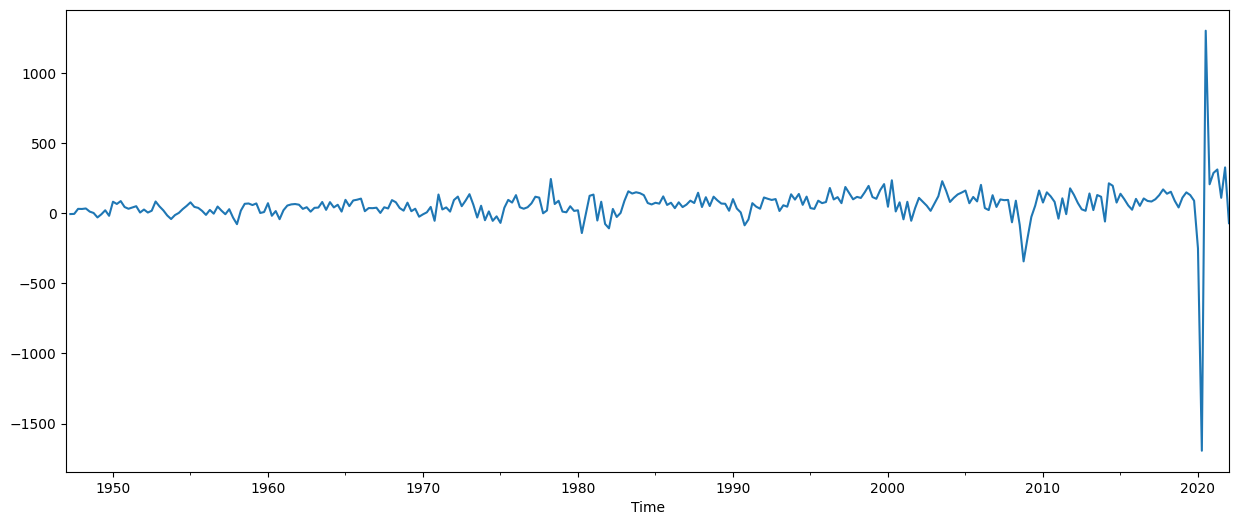

In [ ]:
country_GDP['GDP'].diff().plot(figsize=(15,6))
plt.show()

In [ ]:
Augmented_Dickey_Fuller_Test_func(country_GDP['GDP'].diff().dropna(),'GDP')

Results of Dickey-Fuller Test for column: GDP
Test Statistics             -19.603998
p-value                       0.000000
Lags Used                     0.000000
No. of Observations Used    299.000000
Critical Value (1%)          -3.452411
Critical Value (5%)          -2.871255
Critical Value (10%)         -2.571947
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


# ICE CREAM VS HEATER DATASET

In [ ]:
ice_heater = pd.read_csv('/content/ice_cream_vs_heater.csv',header=0,index_col=0)
ice_heater.head()

,heater,ice cream
Month,,
2004-01,27,13
2004-02,18,15
2004-03,14,16
2004-04,13,19
2004-05,13,21


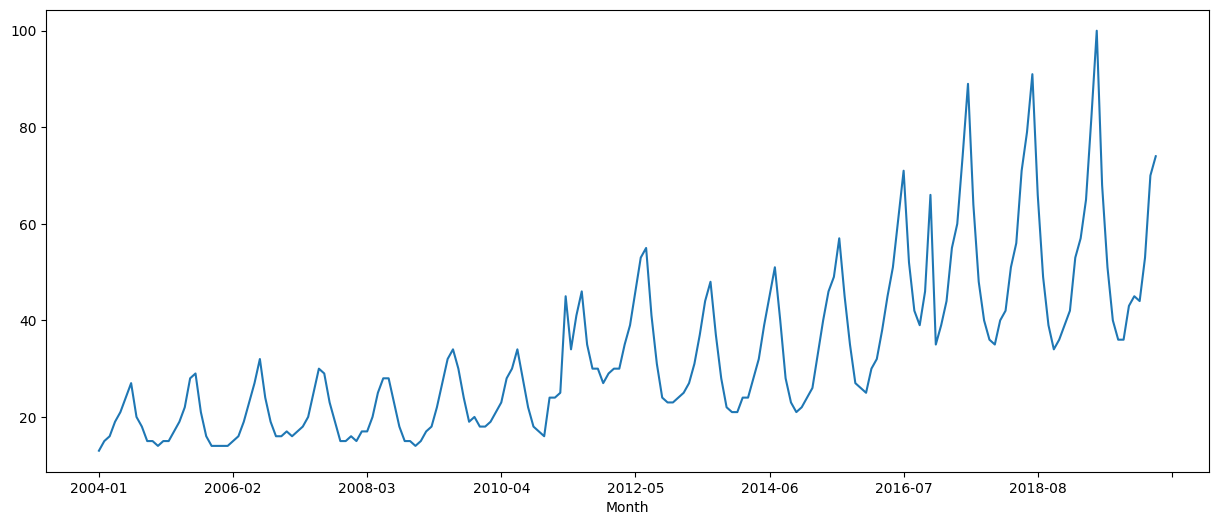

In [ ]:
ice_heater['ice cream'].plot(figsize=(15,6))
plt.show()

In [ ]:
adf_test(ice_heater['ice cream'],'ice cream')

Results of Dickey-Fuller Test for column: ice cream
Test Statistics              -0.303933
p-value                       0.924945
Lags Used                    13.000000
No. of Observations Used    184.000000
Critical Value (1%)          -3.466398
Critical Value (5%)          -2.877380
Critical Value (10%)         -2.575214
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


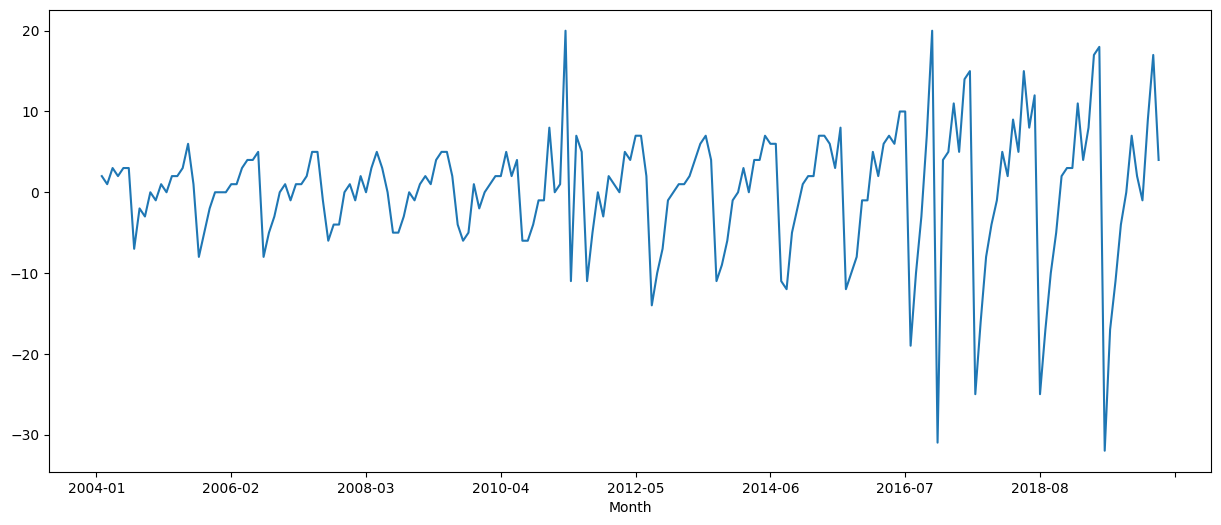

In [ ]:
ice_heater['ice cream'].diff().plot(figsize=(15,6))
plt.show()

In [ ]:
adf_test(ice_heater['ice cream'].diff().dropna(),'ice cream')

Results of Dickey-Fuller Test for column: ice cream
Test Statistics              -4.781718
p-value                       0.000059
Lags Used                    12.000000
No. of Observations Used    184.000000
Critical Value (1%)          -3.466398
Critical Value (5%)          -2.877380
Critical Value (10%)         -2.575214
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


#CONCLUSION
In summary, we have effectively examined the Augmented Dickey-Fuller (ADF) test and its practical applications. By applying the ADF test to three different datasets, we assessed the stationarity of each dataset with success. Additionally, we employed differencing using the pandas library to convert non-stationary data into stationary data, thereby improving the accuracy of our time series analyses.